In [43]:
import numpy as np
import pandas as pd

from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

In [44]:
X = pd.read_csv('../csv/initial_variables.csv', index_col='date', parse_dates=True, infer_datetime_format=True)

# Price change signal
y = (X['close'].pct_change().shift(-1) > 0).astype(int)

In [45]:
model = XGBClassifier()
model.fit(X, y)

/Users/adam/miniforge3/envs/cnn/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/miniforge3/envs/cnn/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:54:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
print(model.feature_importances_)

[0.01120323 0.01633301 0.00486872 0.01201807 0.0132659  0.01424413
 0.01382766 0.01175586 0.01283619 0.01503718 0.01030882 0.0132882
 0.01259528 0.00731762 0.0131497  0.01834076 0.02116998 0.02010502
 0.00782537 0.01884392 0.00981411 0.01174567 0.01402308 0.02391572
 0.0129277  0.         0.01411091 0.01185832 0.01250104 0.0129677
 0.01379527 0.01321201 0.01708001 0.01233455 0.01414656 0.01517559
 0.01218683 0.00878214 0.01376509 0.01776265 0.00993034 0.01284893
 0.01212632 0.0307742  0.01645549 0.01173894 0.0187907  0.01859676
 0.00854449 0.00984654 0.02151142 0.01389521 0.01172863 0.01079632
 0.01297118 0.00989526 0.01414676 0.01232166 0.01276411 0.0162093
 0.01466248 0.01636983 0.01267983 0.01421579 0.01111742 0.01066584
 0.01525516 0.01119612 0.01332751 0.01285932 0.01480991 0.01301033
 0.01509096 0.0084074 ]


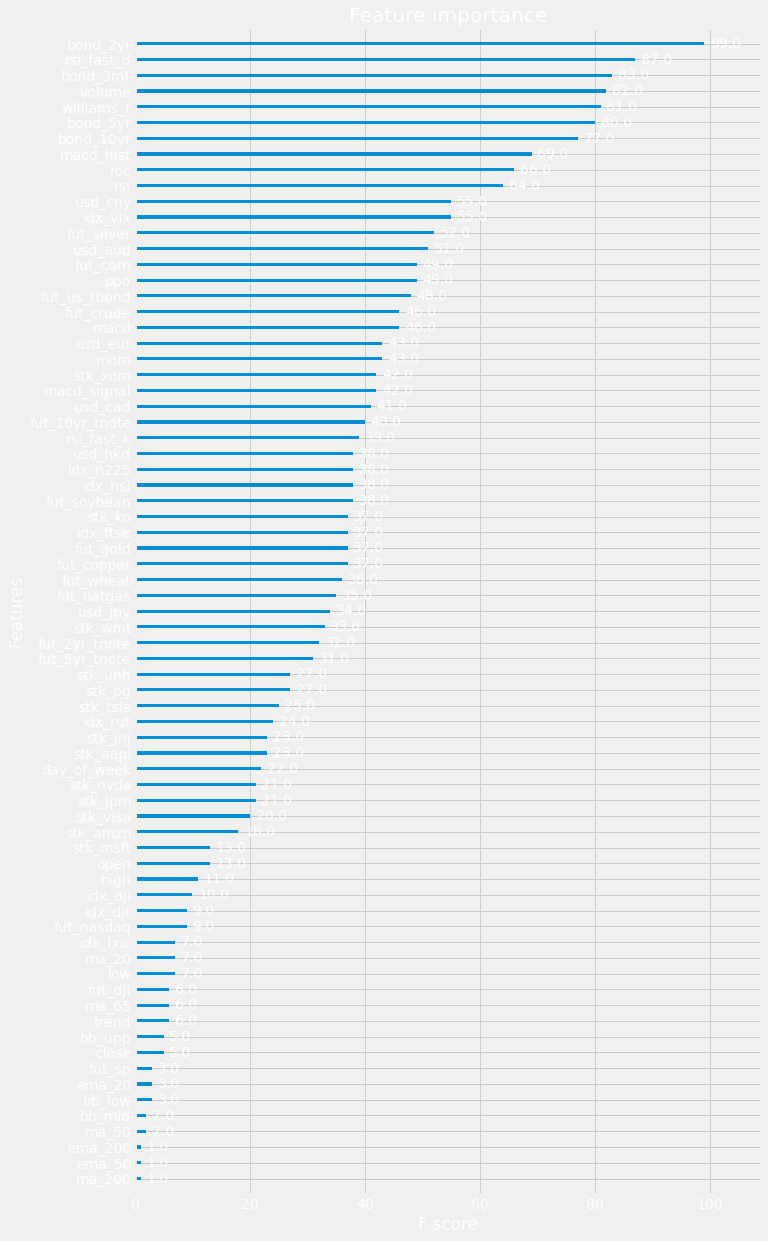

In [47]:
from matplotlib.pyplot import figure

plt.style.use('fast')

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 20)
plt.show()